# Character Digit Recognition

## Support Vector Machine 

**In this project we are going to use Support Vector Machine for the Character Digit Recognition.**

- We will be using Scikit-Learn Dataset which is the built in dataset used in Machine Learning Python.

**Algorithm**

1. Types:
   - Linear SVM
   - Non-Linear SVM
2. Main Components:
   - Hyperplane : It is a decsion plane which separates between a set of objects or classes.
   - Support Vectors : Data Points close to the hyperplane, which defines the separating line better by calculating margins.
   - Margin : It is the gap between between the two lines on the closest class point.
3. SVM Kernel
   - Linear Kernel
   - Radial Basis Function Kernel
   - Plolynomial Kernel
4. Other Tuning Parameters
   - C - Regularization Parameters
   - Degree
   - Gamma
5. Choose good C and gamma
   - Grid Search CV and gamma spaced exponentially far apart to choose good values.

In [2]:
# Importing the libraries
import numpy as np
from sklearn.datasets import load_digits

In [3]:
dataset = load_digits()

In [6]:
# Extracting the useful imformation out of the dataset
print(dataset.data)
print(dataset.target)

print(dataset.data.shape)
print(dataset.images.shape)

image_len = len(dataset.images)
print(image_len)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797, 8, 8)
1797


<Figure size 432x288 with 0 Axes>

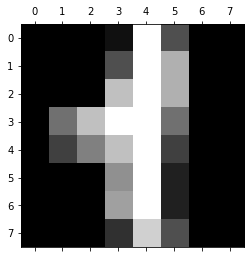

array([[ 0.,  0.,  0.,  1., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16., 11.,  0.,  0.],
       [ 0.,  0.,  0., 12., 16., 11.,  0.,  0.],
       [ 0.,  7., 12., 16., 16.,  7.,  0.,  0.],
       [ 0.,  4.,  8., 12., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 10., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 13.,  5.,  0.,  0.]])

In [11]:
# Visulaizing the dataset

n = 85 # Number of sample chosen randomly out of samples total 1797
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

In [14]:
# Segregating the data into independent and dependent variables
# Input - Pixels and Output - Class
x = dataset.images.reshape((image_len,-1))

In [15]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
y = dataset.target

In [17]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
# Shape of the train and test sets
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


In [22]:
# Train the algorithm
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)

SVC()

In [23]:
# Predicting all the x_test values
y_pred = model.predict(x_test)
print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


In [24]:
# Evaluating the model by finding the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model: 99.11111111111111%


**Additional Step**

[4]




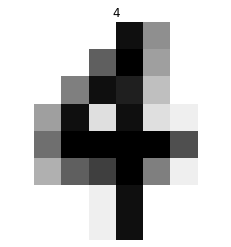

In [32]:
# Predicting what the digit is from thwe test data
n = 650
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n], cmap = plt.cm.gray_r, interpolation = 'nearest')
print(result)
print("\n")
plt.axis("off")
plt.title("%i" %result)
plt.show()